In [1]:
import nltk
from nltk.corpus import twitter_samples     
import matplotlib.pyplot as plt             
import numpy as np  

In [2]:
from utils import process_tweets, build_freqs

In [3]:
pos_tweets=twitter_samples.strings("positive_tweets.json")
neg_tweets=twitter_samples.strings("negative_tweets.json")

In [4]:
all_tweets=pos_tweets+neg_tweets
len(all_tweets)

10000

In [5]:
labels=np.append(np.ones((len(pos_tweets))),np.zeros((len(neg_tweets))))

In [6]:
labels.shape

(10000,)

In [7]:
freqs=build_freqs(all_tweets,labels)

In [8]:
freqs

{(':)', 1.0): 3420,
 ('top', 1.0): 32,
 ('member', 1.0): 16,
 ('followfriday', 1.0): 25,
 ('engag', 1.0): 7,
 ('week', 1.0): 83,
 ('commun', 1.0): 33,
 ('thank', 1.0): 613,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 (':/', 1.0): 5,
 ('mani', 1.0): 31,
 ('hey', 1.0): 74,
 ('odd', 1.0): 2,
 ('jame', 1.0): 7,
 ('call', 1.0): 37,
 ('centr', 1.0): 2,
 ('assist', 1.0): 1,
 ('contact', 1.0): 7,
 ('pleas', 1.0): 93,
 ('night', 1.0): 64,
 ('last', 1.0): 46,
 ('amaz', 1.0): 51,
 ('listen', 1.0): 16,
 ('track', 1.0): 5,
 ('bleed', 1.0): 2,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('profil', 1.0): 2,
 ('yeaaah', 1.0): 1,
 ('mark', 1.0): 1,
 ('rqst', 1.0): 1,
 ('fb', 1.0): 5,
 ('verifi', 1.0): 2,
 ('succeed', 1.0): 1,
 ('accnt', 1.0): 2,
 ('15', 1.0): 5,
 ('yipppi', 1.0): 1,
 ('tick', 1.0): 1,
 ('day', 1.0): 239,
 ('blue', 1.0): 8,
 ('got', 1.0): 68,
 ('irresist', 1.0): 2,
 ('one', 1.0): 126,
 ('flipkartfashionfriday', 1.0): 17,
 ('enjoy', 1.0): 75,
 ('friday', 1.0): 110,
 ('love', 1.0): 33

In [9]:
print("len of freqs ",len(freqs))

len of freqs  13066


In [10]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

In [11]:
data = []
for word in keys:
    pos = 0
    neg = 0
    if (word,1) in freqs: pos=freqs[(word,1)]
    if (word,0) in freqs: neg=freqs[(word,0)]
    data.append([word,pos,neg])

In [12]:
data

[['happi', 200, 24],
 ['merri', 1, 0],
 ['nice', 97, 19],
 ['good', 230, 98],
 ['bad', 18, 73],
 ['sad', 5, 120],
 ['mad', 3, 10],
 ['best', 64, 22],
 ['pretti', 20, 15],
 ['❤', 19, 12],
 [':)', 3420, 2],
 [':(', 1, 4409],
 ['😒', 1, 2],
 ['😬', 0, 2],
 ['😄', 3, 1],
 ['😍', 2, 1],
 ['♛', 0, 35],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 45, 48],
 ['magnific', 2, 0]]

/home/srikar/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/srikar/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


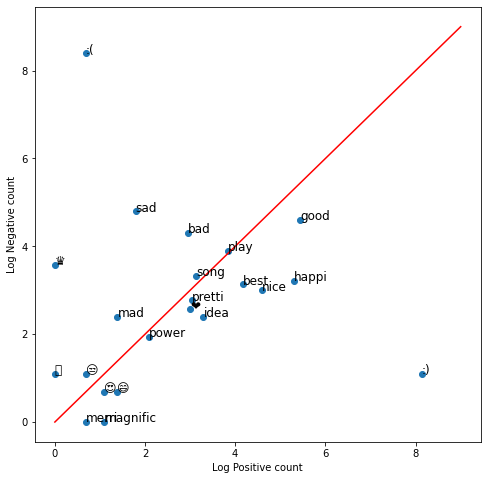

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))

#converting counts to logarithmic scale and avoiding log(0)=inf , we need to add 1 to each count
x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data]) 
ax.scatter(x, y)  
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
ax.plot([0, 9], [0, 9], color = 'red')
plt.show()